# **Computer Vision**

## **Face landmark detection**
; Designing, building, testing and critiquing a system for performing face alignment, aka. locating facial landmarks in images.

***Aim***
* Write and document a computer program to extract useful information from image data.
* Propose designs for simple computer vision systems.
* Determine the applicability of a variety of computer vision techniques to practical problems.
* Describe and recognise the effects of a variety of image processing operations.

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
!wget "http://users.sussex.ac.uk/~is321/training_images.npz" -O training_images.npz
# The test images (without points)
!wget "http://users.sussex.ac.uk/~is321/test_images.npz" -O test_images.npz
# The example images are here
!wget "http://users.sussex.ac.uk/~is321/examples.npz" -O examples.npz
# Load the data using np.load

--2020-05-28 06:50:50--  http://users.sussex.ac.uk/~is321/training_images.npz
Resolving users.sussex.ac.uk (users.sussex.ac.uk)... 139.184.14.119
Connecting to users.sussex.ac.uk (users.sussex.ac.uk)|139.184.14.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375302693 (358M)
Saving to: ‘training_images.npz’

training_images.npz 100%[===================>] 357.92M  18.5MB/s    in 22s     

2020-05-28 06:51:13 (16.2 MB/s) - ‘training_images.npz’ saved [375302693/375302693]

--2020-05-28 06:51:14--  http://users.sussex.ac.uk/~is321/test_images.npz
Resolving users.sussex.ac.uk (users.sussex.ac.uk)... 139.184.14.119
Connecting to users.sussex.ac.uk (users.sussex.ac.uk)|139.184.14.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74915629 (71M)
Saving to: ‘test_images.npz’

test_images.npz     100%[===================>]  71.44M  16.6MB/s    in 6.0s    

2020-05-28 06:51:20 (11.9 MB/s) - ‘test_images.npz’ saved [74915629/74915629]

--2020

In [ ]:
data = np.load('training_images.npz', allow_pickle=True)    # get training data 
imagesTr = data['images']                                   # Extract training images which are already preprocessed 
imagesPts = data['points']                                  # The meaning of 'points' is face landmarks of training images

data2 = np.load('test_images.npz', allow_pickle=True)       # get test data
imagesTe = data2['images']                                  # Extract testing images, they are also preprocessed in advance
#plt.imshow(imagesTe[0])

(554, 250, 250, 3) (2811, 68, 2)


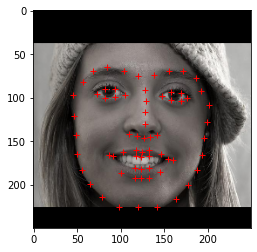

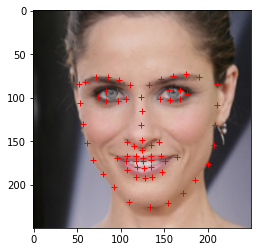

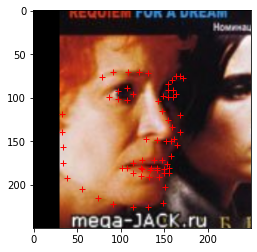

In [ ]:
print(imagesTe.shape, imagesPts.shape)                       
def visualise_pts(img, pts):                                # visualise face landmarks are corresponded to the training images
  import matplotlib.pyplot as plt
  plt.imshow(img)
  plt.plot(pts[:, 0], pts[:, 1], '+r')
  plt.show()

for i in range(3):                                          # show 3 random training images with their face landmarks 
  idx = np.random.randint(0, imagesTr.shape[0])
  visualise_pts(imagesTr[idx, ...], imagesPts[idx, ...])

In [ ]:
# Modules below have been used for using Convolutional Neural Network(CNN) in order to train the training images
import tensorflow as tf
from tensorflow import keras
from keras import utils
from keras.layers import *
from keras.models import *
from keras.optimizers import * 
from keras.callbacks import *

Using TensorFlow backend.


In [ ]:
'''
In order to train data, those should be normalised (from 0 ~ 1)
so the type of data has become float and the value of indexes in the data are divided by 255.0 (to normalise)
'''
train_images = imagesTr.astype('float32')
train_images = train_images/255.0

test_images = imagesTe.astype('float32')
test_images = test_images/255.0

train_labels = imagesPts.reshape(2811, 136, order='C')                          # reshape nd.array from 2811*68*2 to 2811*2 to put these data in the CNN
train_labels = train_labels/255.0

#train_labels = tf.keras.utils.to_categorical(train_labels)                     # These codes could have been use if I had set the loss parameter to categorical_crossentropy in compile method of 'model'
#test_labels = tf.keras.utils.to_categorical(test_labels, num_classes = None)

In [ ]:
'''
The code below is the fully connected multi-layer perceptron called CNN.
But there is a BatchNormalisation method to improve the original CNN, it is also known as deep-CNN(dCNN)
'''
model = Sequential()                                                                        # In the keras, it makes model by combining layers
# Conv2D is convolution layer which belongs to hidden layer.
# The first parameter is the number of convolution filter.
# kernel_size : the matrix of convolution kernel in my cnn, all the kernel size is 64
# padding : define the way of processing the boundary. 'same' means that the output image size is the same as the input image size.
# input_shape : define the input form, excluding the number of samples. You only need to define it when it's the first layer in the model.
# activation : define the activation function. 'relu' is called to rectifier, using in the hidden layer usually

# MaxPooling layer creates a small output image by extracting only the major values from the output image of the Convolution Layer. This prevents minor regional changes from affecting.
# pool_size : specify the vertical and horizontal reduced ratio. If (2, 2) the output image size is reduced by half the size of the input image.

# BatchNormarlisation : is introduced to increase the efficiency of learning. It can also do data regularization.
# It has many benebits
# Improve learning speed (because it can be set to a high learning rate)
# Less dependence on weighting initial value selection (because output values are normalized every time data are studied)
# It can reduce overfitting risk (replaceable techniques : dropouts)
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', input_shape = (250, 250, 3)))      
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten converts images into one-dimension
# If data is through the Convolution layer or Maxpooling layer on CNN, only the key features are extracted, and the key features are delivered to the fully connected layer to learn. 
# The Convolution layer and Maxpooling layer primarily deal with two-dimensional data, but they need to be replaced with one-dimensional data to deliver to the prefabricated layer.
model.add(Flatten())                                                                        
model.add(Dense(128, activation = 'relu'))                                                  # Add a fully connected layer with 128 units to the model
model.add(Dense(512, activation = 'relu'))                                                  # Add a fully connected layer with 512 units to the model
model.add(Dense(136))                                                                       # Add layer with 136 output units

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_122 (Conv2D)          (None, 250, 250, 64)      1792      
_________________________________________________________________
batch_normalization_82 (Batc (None, 250, 250, 64)      256       
_________________________________________________________________
activation_97 (Activation)   (None, 250, 250, 64)      0         
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 125, 125, 64)      0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 125, 125, 64)      36928     
_________________________________________________________________
batch_normalization_83 (Batc (None, 125, 125, 64)      256       
_________________________________________________________________
activation_98 (Activation)   (None, 125, 125, 64)    

In [ ]:
# after constructing model, call compile method to set training process
# loss : in the optimization process, set the loss function which will be minimised
# oprtimiser : set the training process. 
# metrics : in order to monitor training
model.compile(loss = 'mean_squared_error', optimizer= 'Adam', metrics = ['accuracy'])

In [ ]:
#early_stopping = EarlyStopping(monitor='var_loss', patience=10)   # to prevent overfitting but this cnn wasn't reached over 1.0


# batch_size : When the data is delivered, the model divides the data into small batches and loops it during training.
#              This integer value specifies the size of the batch. If the total number of samples does not devided by the batch size, the last batch may be smaller.
# epoch : One epoch is a single loop of the entire input data (which is done in small batches).
# validation : When a prototype of a model is created, you should easily monitor performance from the validation data.
#               Passing the tuples of inputs and labels to this parameter produces a loss of data and metrics passed in in inference mode at the end of each epoch.
history = model.fit(
    train_images, train_labels,
    validation_split = 0.2,
    batch_size = 100, epochs = 128,
    verbose = 1, shuffle = True
    #callbacks = [early_stopping]
)

Train on 2248 samples, validate on 563 samples
Epoch 1/128
2248/2248 [==============================] - 11s 5ms/step - loss: 7.8418e-05 - accuracy: 0.8025 - val_loss: 4.6963e-04 - val_accuracy: 0.7069
Epoch 2/128
2248/2248 [==============================] - 11s 5ms/step - loss: 7.5406e-05 - accuracy: 0.7980 - val_loss: 4.4766e-04 - val_accuracy: 0.6803
Epoch 3/128
2248/2248 [==============================] - 11s 5ms/step - loss: 6.5129e-05 - accuracy: 0.7980 - val_loss: 4.4589e-04 - val_accuracy: 0.7034
Epoch 4/128
2248/2248 [==============================] - 11s 5ms/step - loss: 8.8919e-05 - accuracy: 0.8012 - val_loss: 4.6516e-04 - val_accuracy: 0.7123
Epoch 5/128
2248/2248 [==============================] - 11s 5ms/step - loss: 7.6933e-05 - accuracy: 0.7940 - val_loss: 4.6087e-04 - val_accuracy: 0.6927
Epoch 6/128
2248/2248 [==============================] - 11s 5ms/step - loss: 6.6900e-05 - accuracy: 0.7967 - val_loss: 4.5378e-04 - val_accuracy: 0.7211
Epoch 7/128
2248/2248 [======

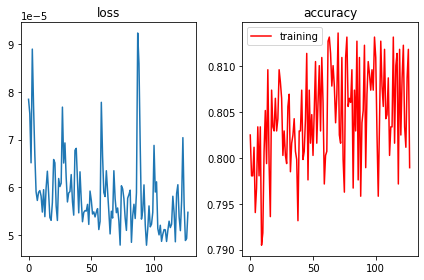

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.plot(history.history['accuracy'], 'r-', label="training")
plt.legend()
plt.tight_layout()
plt.show()

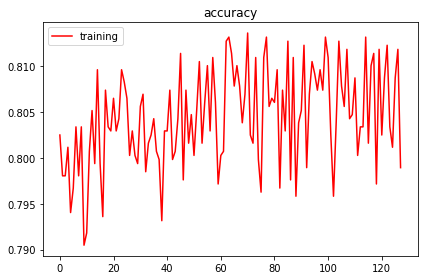

In [ ]:
plt.title("accuracy")
plt.plot(history.history['accuracy'], 'r-', label="training")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# .evaluate : evaluate the loss or accuracy of the inference mode with the given data
train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=1)

2811/2811 [==============================] - 4s 2ms/step


In [ ]:
print("train_ accuracy : {}, train_:loss : {}".format(train_accuracy,train_loss))

train_ accuracy : 0.7829954028129578, train_:loss : 0.00012976717757894708


In [ ]:
# .predict : predict the output of the last layer in in inference mode with the given data and returns it as a numpy array
test_pts = model.predict(test_images)
print(test_pts)
test_pts.shape

[[0.15513474 0.3376688  0.15839142 ... 0.7221414  0.41725072 0.7154616 ]
 [0.1955145  0.3886734  0.20198165 ... 0.6835166  0.46245387 0.6808213 ]
 [0.1980051  0.3800443  0.20862694 ... 0.7171656  0.47714674 0.71467245]
 ...
 [0.08475681 0.3843415  0.09386098 ... 0.66193795 0.54200923 0.66146374]
 [0.272412   0.383198   0.25997433 ... 0.7163305  0.42332837 0.70467615]
 [0.2808207  0.48102248 0.2961142  ... 0.6784891  0.4961078  0.68390906]]


(554, 136)

In [ ]:
test_pts = test_pts.reshape(554,68,2,order = "C")  # convert array to original dimension because the number of face landmarks is 68
test_pts = test_pts * 255.0
test_pts.shape

(554, 68, 2)

(554, 250, 250, 3) (554, 68, 2)


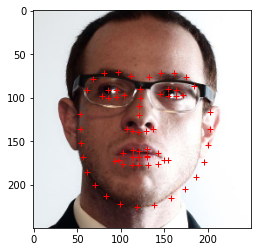

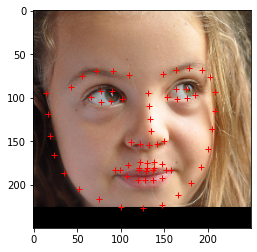

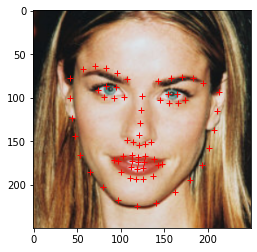

In [ ]:
'''
this function visualise face alignment of test images. This system has 78% of accuracy so some landmarks are slightly out of line.
'''
print(imagesTe.shape, test_pts.shape)    
def visualise_test_pts(img, pts):          
  import matplotlib.pyplot as plt
  plt.imshow(img)
  plt.plot(pts[:, 0], pts[:, 1], '+r')
  plt.show()

for i in range(3):
  idx = np.random.randint(0, imagesTe.shape[0])
  visualise_pts(imagesTe[idx, ...], test_pts[idx, ...])

In [ ]:
data3 = np.load('examples.npz', allow_pickle=True)       # get example data
imagesEx = data3['images']  

example_images = imagesEx.astype('float32')
example_images = example_images/255.0

example_pts = model.predict(example_images)
example_pts = example_pts.reshape(6,68,2,order = "C")
example_pts = example_pts * 255.0

(6, 250, 250, 3) (6, 68, 2)


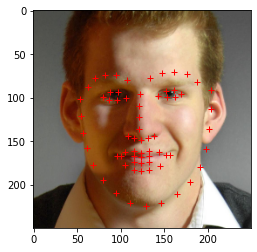

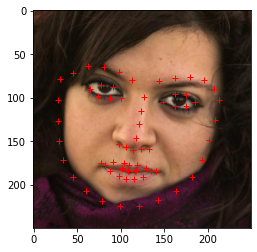

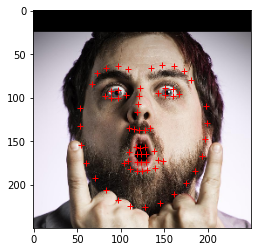

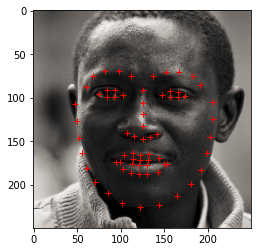

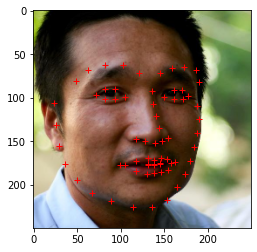

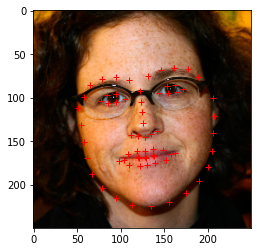

In [ ]:
'''
show the face landmarks of example images
'''
print(imagesEx.shape, example_pts.shape)    
def visualise_example_pts(img, pts):          
  import matplotlib.pyplot as plt
  plt.imshow(img)
  plt.plot(pts[:, 0], pts[:, 1], '+r')
  plt.show()

for i in range(6):
  visualise_pts(imagesEx[i], example_pts[i])

In [ ]:
def save_as_csv(points, location = '.'):
  """
  Save the points out as a .csv file
  :param points: numpy array of shape (no_image, no_points, 2) to be saved
  :param location: Directory to save results.csv in. Default to current working directory
  """
  np.savetxt(location + '/results.csv', np.reshape(points, (points.shape[0], -1)), delimiter=',')


In [ ]:
save_as_csv(test_pts)

In [ ]:
from google.colab import files
files.download("results.csv")